# **Using spaCy for Text Preprocessing**

---

Date: Mar 16, 2021

Author: Jerónimo Arenas-García (jeronimo.arenas@uc3m.es)

Version 1.0

---

This notebook is based on the [spaCy 101 course](https://spacy.io/usage/spacy-101) and documentation available at the spaCy website.

Our goal here is to present a basic overview of spacy that covers the elements necessary for implementing the preprocessing pipelines that we will need for obtaining the Bag of Word Representation of the document.

A more [Advanced Tutorial](https://course.spacy.io/en/) by Ines Montani, one of the main developers of the library, is proposed for further study of interested students. In that tutorial, you can learn how to use spaCy matching functionalities, or how to retrain neural network models using your own training data.

In [1]:
# Common imports 

import numpy as np
import pandas as pd
import zipfile as zp
from termcolor import colored
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

In [2]:
#To wrap long text lines
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [3]:
#For fancy table Display
%load_ext google.colab.data_table

## **1. What is spaCy**

---

   - spaCy is a free, open-source library for NLP in Python
   - Providing optimized pipelines for taking models to production, i.e., facilitating integration with other components, and scalability
   - Current version (spaCy v3, released in Feb 2021) comes with pre-trained deep learning models, including state-of-the-art transformers, trained over huge data sets of documents
   - Available models can be fine-tuned to better fit specific document collections characteristics

SpaCy is intended to be used as a component of a more complex system, not as final application itself, i.e., it cannot be directly used to implement a chatbot system, a sentiment analyzer, etc ... but it provides a lot of tools that are easy to integrate for taking such systems into production.

### *1.1. SpaCy Features*

spaCy provides a lot of features similar to those we have already discussed for the NLTK library.


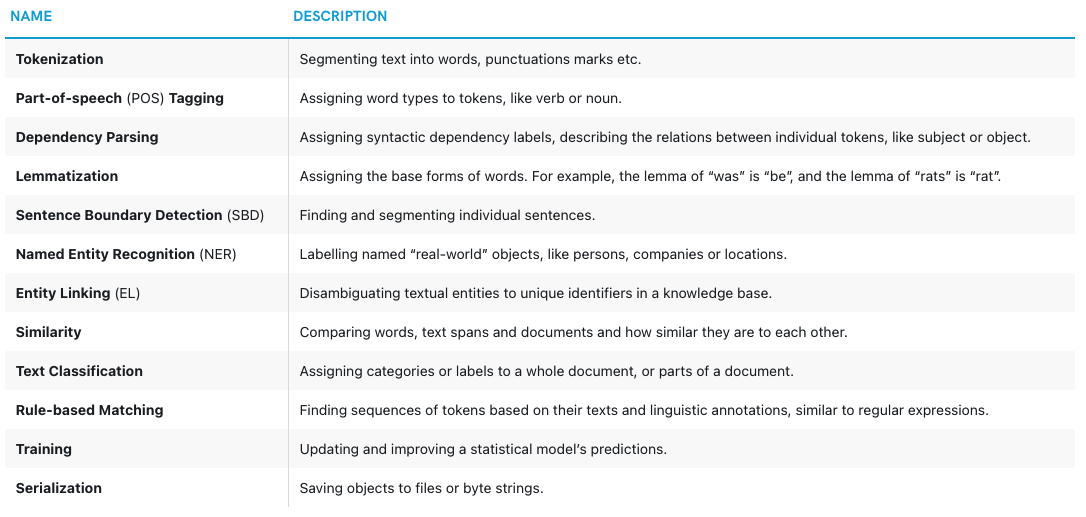

spaCy makes it very easy to concatenate several of these operations:

   - **Pipelines** allow to concatenate a number of components to carry out the desired preprocessing tasks
   - Specific components can be enabled or disabled if necessary
   - It is possible to add *ad-hoc* components
   - Other developers are providing specific components ready to use in spaCy, e.g., [spaCy langdetect](https://spacy.io/universe/project/spacy-langdetect) is a wrapper for the [langdetect](https://github.com/Mimino666/langdetect) library for language classification.

### *1.2. Language and Models*

spaCy v3 comes with 55 pre-trained models for 17 languages. Details and installation instructions can be found [here](https://spacy.io/usage/models).

For most of these languages, three models are available, e.g.:
   - en_core_web_sm
   - en_core_web_md
   - en_core_web_lg

[Convention for the model name is language_core_source_size]

   - These models are optimized for CPU usage, but they still incorporate neural networks for certain components. 
   - Medium and Large models come with word-embeddings available, while small model does not
   - The larger the model, the higher the accuracy, but also the longer it takes to analyze a text fragment. I.e., accuracy comes at the cost of larger networks and, therefore, more computation
   - Accuracy of pipeline components are provided for specific annotated datasets

For English, Spanish, French, German, and Chinese, a fourth model (e.g. en_core_web_trf) based on transformers is also provided. These models are optimized to run over a GPU

### *1.3. Performance*

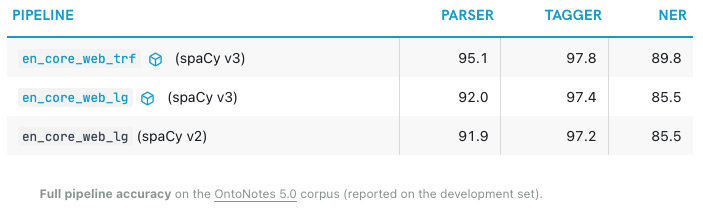

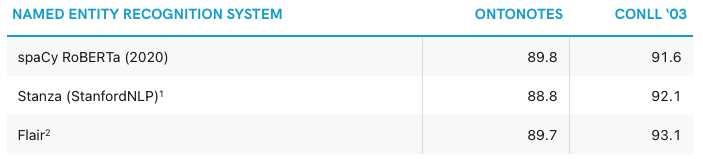

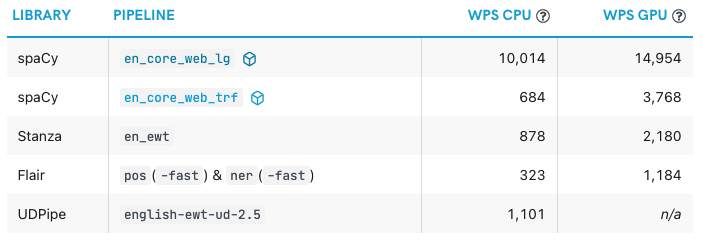

--- WPS: Words per second

## **2. Using spaCy in Google Colab**
--- 

### *2.1. Installing spaCy and loading language models* 

You can check that Google Colab already comes with spaCy v2 preinstalled. However, since in this notebook we will be using the new v3 release, you will need to upgrade to the latest available version

In [4]:
!pip install --upgrade spacy
import spacy

     |████████████████████████████████| 12.8MB 326kB/s 
     |████████████████████████████████| 1.1MB 47.7MB/s 
     |████████████████████████████████| 460kB 42.7MB/s 
     |████████████████████████████████| 9.1MB 49.2MB/s 
     |████████████████████████████████| 122kB 35.4MB/s 
  Created wheel for smart-open: filename=smart_open-3.0.0-cp37-none-any.whl size=107098 sha256=36af50c4f23e23a0816c1711640f6ca9497c90bc6738e8220b761be8ff463ac3
  Stored in directory: /root/.cache/pip/wheels/18/88/7c/f06dabd5e9cabe02d2269167bcacbbf9b47d0c0ff7d6ebcb78
Successfully built smart-open
  Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Found existing installation: smart-open 4.2.0
    Uninstallin

In order to use a specific model you need to download it first. If working locally, you will need to download the model just once; however, in the cloud your environment resets and you will need to download the model on each session.

For this tutorial we will use an English model of medium size, the smallest model that incorporates word embeddings. For a complete list of available models, please refer to the [spaCy website](https://spacy.io/usage/models).


In [5]:
!python -m spacy download en_core_web_md

2021-03-23 19:09:16.480230: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
     |████████████████████████████████| 47.1MB 86kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


### *2.2. Obtaining Model Info*

You can retrieve the most relevant information about available language models using the following command

```
spacy.info('model_name')
```

Note that you can only apply this command on models that have already been downloades. Otherwise, an exception is thrown.

**Exercise 1**: Run the following command and find the information related to
   - Components included in the pipeline
   - Are all components enabled?
   - How many types of entities can be recognized by the corresponding component?
   - What Part-of-Speech elements can you recognize?
   - What is the dimension of the word-embeddings incorporated in the model?

Detailed information about some specific components of the pipeline, as well as how they can be used, will be studied in the next sections.

In [ ]:
spacy.explain('HYPH')

'punctuation mark, hyphen'

In [ ]:
spacy.info('en_core_web_md')

{'author': 'Explosion',
 'components': ['tok2vec',
  'tagger',
  'parser',
  'senter',
  'ner',
  'attribute_ruler',
  'lemmatizer'],
 'description': 'English pipeline optimized for CPU. Components: tok2vec, tagger, parser, senter, ner, attribute_ruler, lemmatizer.',
 'disabled': ['senter'],
 'email': 'contact@explosion.ai',
 'labels': {'attribute_ruler': [],
  'lemmatizer': [],
  'ner': ['CARDINAL',
   'DATE',
   'EVENT',
   'FAC',
   'GPE',
   'LANGUAGE',
   'LAW',
   'LOC',
   'MONEY',
   'NORP',
   'ORDINAL',
   'ORG',
   'PERCENT',
   'PERSON',
   'PRODUCT',
   'QUANTITY',
   'TIME',
   'WORK_OF_ART'],
  'parser': ['ROOT',
   'acl',
   'acomp',
   'advcl',
   'advmod',
   'agent',
   'amod',
   'appos',
   'attr',
   'aux',
   'auxpass',
   'case',
   'cc',
   'ccomp',
   'compound',
   'conj',
   'csubj',
   'csubjpass',
   'dative',
   'dep',
   'det',
   'dobj',
   'expl',
   'intj',
   'mark',
   'meta',
   'neg',
   'nmod',
   'npadvmod',
   'nsubj',
   'nsubjpass',
   'nummo

## **3. Spacy Data Structures and Processing Pipelines**
---

### *3.1. Introduction and basic usage*

Processing texts with spaCy is really easy. You just need to load the model, and pass any text you wish to process. SpaCy will execute a series of transformations (a pipeline) and return a `Doc` object. The returned object has all information extracted from the original text, and provides a number of features to facilitate accessing the desired information.

<figure>
<center>
<img src='https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg' width="800"></img>
<figcaption>Source: https://spacy.io/pipeline-fde48da9b43661abcdf62ab70a546d71.svg</figcaption></center>
</figure>

In [ ]:
text = 'Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers novel materials generally controls the science and technology of the future. Transition metal oxides have attracted enormous interest within both the basic and applied science communities.  However, for many decades, the overwhelming balance of effort was focused on the 3d-elements (such as iron, copper, etc.) and their compounds; the heavier 4d- and 5d-elements (such as ruthenium, iridium, etc., which constitute two thirds of the d-elements listed in the Periodic Table) and their compounds have been largely ignored until recently. The principal investigator seeks to discover novel materials containing 4d- and/or 5d-elements and understand how they offer wide-ranging opportunities for the discovery of new physics and, ultimately, new device paradigms. This project also provides rigorous training to all students involved, focusing on synthesis and characterization techniques covering a broad spectrum of materials and experimental probes available in the principal investigator\'s laboratory. Technical Abstract: Physics driven by spin-orbit interactions is among the most important topics in contemporary condensed matter physics. Since the spin-orbit interaction is comparable to the on-site Coulomb and other relevant interactions, it creates a unique balance between competing interactions that drive complex behaviors and exotic states not observed in other materials. The project encompasses a systematic effort to elucidate physics of novel phenomena in spin-orbit-coupled and correlated materials and a rigorous search for new materials having exotic ground states. This project focuses on the following areas: (1) Novel phenomena at high pressures and high magnetic fields, (2) Unusual correlations between the insulating gap and magnetic transition in iridates and ruthenates, (3) Exotic metallic and superconducting states in iridates, (4) Mott insulators with "intermediate-strength" spin-orbit interaction and other competing energies, and (5) Single-crystal synthesis and search for novel materials. The principal investigator is one of a few key pioneers who have initiated seminal studies on iridates and, before that, ruthenates, and has comprehensive facilities and proven expertise for single-crystal synthesis and wide-ranging studies of structural, transport, magnetic, thermal and dielectric properties as functions of temperature, magnetic field, pressure and doping.'
print(text)

Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers novel materials generally controls the science and technology of the future. Transition metal oxides have attracted enormous interest within both the basic and applied science communities.  However, for many decades, the overwhelming balance of effort was focused on the 3d-elements (such as iron, copper, etc.) and their compounds; the heavier 4d- and 5d-elements (such as ruthenium, iridium, etc., which constitute two thirds of the d-elements listed in the Periodic Table) and their compounds have been largely ignored until recently. The principal investigator seeks to discover novel materials containing 4d- and/or 5d-elements and understand how they offer wide-ranging opportunities for the discovery of new

In [ ]:
nlp = spacy.load('en_core_web_md')
doc = nlp(text)
print(colored('============= Original Text =============', 'blue'))
print(doc)
print(colored('\n============= Lemmatized Text =============', 'red'))
print(' '.join([tk.lemma_ for tk in doc]))
print(colored('\n============= Entities Found =============', 'green'))
print('\n'.join([ent.text for ent in doc.ents]))

============= Original Text =============
Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers novel materials generally controls the science and technology of the future. Transition metal oxides have attracted enormous interest within both the basic and applied science communities.  However, for many decades, the overwhelming balance of effort was focused on the 3d-elements (such as iron, copper, etc.) and their compounds; the heavier 4d- and 5d-elements (such as ruthenium, iridium, etc., which constitute two thirds of the d-elements listed in the Periodic Table) and their compounds have been largely ignored until recently. The principal investigator seeks to discover novel materials containing 4d- and/or 5d-elements and understand how they offer wide-rang

In [ ]:
doc[3:10].vector

array([-1.79691717e-01,  1.13013998e-01, -6.51017427e-02, -1.15570284e-01,
       -2.00222984e-01,  2.65899569e-01, -1.00822710e-01, -1.20210715e-01,
       -1.39116868e-01,  2.05118561e+00, -1.12642281e-01,  1.98464274e-01,
        1.41494289e-01,  3.36268581e-02,  9.21960250e-02, -2.30653211e-01,
        3.50149125e-01,  1.48141289e+00, -2.68212140e-01, -3.49975854e-01,
        2.04684988e-01, -6.96782842e-02, -2.58601476e-02,  7.92042837e-02,
        9.64444950e-02,  1.49350017e-01,  1.68396428e-01,  1.45922853e-02,
       -1.14878707e-01,  7.58821610e-03, -1.30126148e-01, -2.43561435e-02,
        4.72201481e-02,  2.79288143e-02,  1.05408430e-01, -1.25857502e-01,
        8.28882828e-02,  8.72145742e-02,  4.27557155e-02, -7.45784193e-02,
        3.72498989e-01,  5.37365675e-02, -1.08912876e-02, -1.96987718e-01,
       -8.52842722e-03,  7.62128457e-02,  6.31778613e-02, -2.06910580e-01,
        7.98778534e-02, -9.59685817e-02,  3.34887095e-02, -3.13885929e-03,
       -6.65212944e-02, -

Note how in the example we could easily access all lemmas and entities found by iterating over the document (variable `doc`) itself or over its entitities (`doc.ents`)

### *3.2. Architecture*

Central data structures:

   - `Language`: is instantiated when loading the model, and contains the pipeline. Transforms text into spaCy documents.
   - `Doc`: Sequence of tokens with annotations. We can iterate over tokens, access individual tokens (`doc[3]`) or a *span* of tokens (`doc[5:15]`).
   - `Vocab`: Unique vocabulary associated to the language. Vocabulary is composed of `Lexemes` that are hashed and stored in the vocabulary with word vectors and attributes. This is memory efficient and assures a unique ground truth.

<figure>
<center>
<img src='https://spacy.io/architecture-415624fc7d149ec03f2736c4aa8b8f3c.svg' width="600"></img>
<figcaption>Source: https://spacy.io/architecture-415624fc7d149ec03f2736c4aa8b8f3c.svg</figcaption></center>
</figure>

The **Tokenizer** component of the pipeline is special, since this is where the `Doc` object is generated from the text. Subsequent pipeline components perform operations *in place*, obtanining new attributes that are stored as annotations in the tokens.

   - Pipeline components can be fine-tuned using annotated data
   - New components can be easily implemented and added to the Pipeline

**Exercise 2**:
   - Find the Spans associated to the following text fragments contained in the original text:
      * `structural, transport, magnetic, thermal and dielectric properties`
      * `temperature, magnetic field, pressure and doping`
      * `This project also provides rigorous training to all students involved`
   - Use command `dir` to examine what are the different methods and attributes of the Span object
   - Recover the vector representation associated to each of the previous strings
   - Compute the Euclidean distances between the selected Spans

--Hint: To compute Euclidean distances at this point, it can be convenient to use numpy function `np.linalg.norm`. Later in the notebook you will find that spaCy provides functions to carry out these calculations.

In [ ]:
#<SOL>
vec1 = nlp('structural, transport, magnetic, thermal and dielectric properties').vector
vec2 = nlp('temperature, magnetic field, pressure and doping').vector
vec3 = nlp('This project also provides rigorous training to all students involved').vector
print(np.linalg.norm(vec1-vec2))
print(np.linalg.norm(vec1-vec3))
print(np.linalg.norm(vec2-vec3))
#</SOL>

2.1861718
3.648339
3.5070417


**Exercise 3:** You can access all vocab elements as `nlp.vocab`. Each element of the vocabulary is known as a `Lexeme`
   - Use command `dir` to examine what are the different methods and attributes of `Lexeme` objects.
   - For each element in the vocabulary, print the text representation, the hash representation, and whether the term should be considered as a stopword or not.
   - Find all stopwords in the Vocabulary
   - Which is the current size of your vocabulary? Create an additional doc object from a text with words that have not been previously used, and check the new size of the vocabulary after processing the new document.

--Hint: For displaying the vocabulary in a convenient format, you can store the requested information in a Pandas DataFrame, and print the DataFrame instead

In [ ]:
#<SOL>
vocab = []
for wd in nlp.vocab:
    vocab.append([wd.text, wd.orth, wd.is_stop])

vocab = pd.DataFrame(vocab, columns=['Term', 'Hash', 'Stopword'])
vocab
#</SOL>

,Term,Hash,Stopword
0,nuthin,17780520906925867008,False
1,ü.,9616619598791593984,False
2,p.m,6364458155313776643,False
3,Kan,8969436956900823045,False
4,Mar,12595687976425261068,False
...,...,...,...
956,She's,7021531544473137138,False
957,ve,10105644630884274164,False
958,E.g.,4115108073383360500,False
959,:-|,280013313535684598,False


In [ ]:
#<SOL>
stopw = vocab[vocab['Stopword']==True]
stopw
#</SOL>

,Term,Hash,Stopword
19,it,10239237003504588839,True
32,is,3411606890003347522,True
36,Might,9747367433533540424,True
45,whoever,5788244594254956635,True
46,where,16318918034475841628,True
...,...,...,...
902,Had,6865576549405853585,True
918,However,11935558616188258213,True
927,should,10292920167869855674,True
935,are,5012629990875267006,True


In [ ]:
#<SOL>
print(len(nlp.vocab))
doc_aux = nlp('This is just a catalogue of some weird nomenclatures to increase the vocabulary size: USA, OMG, teeth, tooth. We can also include words which are in a different language or just typos: mecachis, guau, hause')
print(len(nlp.vocab))
#</SOL>

961
981


### *3.3. Usual Pipelines Components and Annotations*

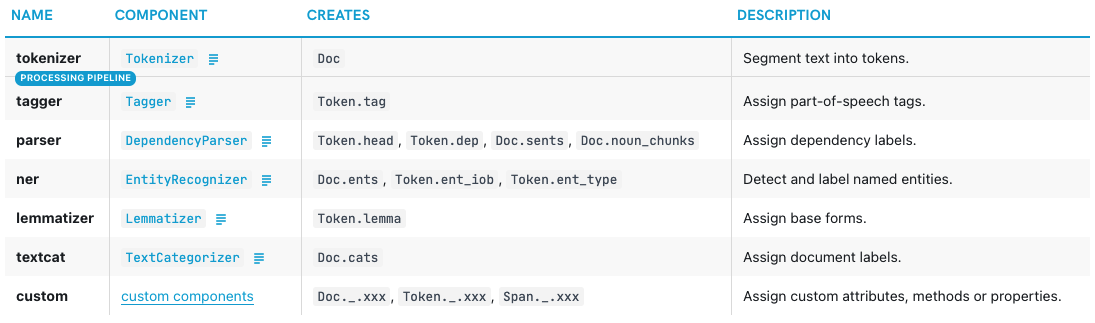


## **4. Linguistic Features**
---
In this Section we will review a set of liguistic features provided by most spaCy pretrained pipelines. We will focus mainly on pipeline components that are relevant to build *Bag of Words* (BoW) representations of text.

### *4.1. Tokenizer*

#### 4.1.1. Word Tokenization

The Tokenizer is always the first component of the spaCy pretrained pipelines.

   - It has the important role of producing a `Doc` object out of a text string
   - It first splits the string using blank spaces
   - Then tokens are processed sequentially from left to right performing two operations
      * First, language-specific rules and exceptions are applied (e.g., in English "don't" is splitted into two separate tokens, but U.K. is kept as one token)
      * Second, prefixes or suffixes are identified. This is relevant to separate punctuation marks from the main tokens
   - It is important to note that tokenization rules, as well as exceptions are language specific. This means you need to make sure that the languages of the text and the selected Tokenizer match, otherwise you could get unexpected results.

Once the `Doc` object has been created, you can easily iterate over the identified tokens. Note also that the original text is preserved. You can access the string representation of `Doc`, `Span`, `Token` and even `Lexeme` objects by using the `text` attribute.

In [ ]:
shortext = 'Natural Language Processing is a key component of many relevant Artificial Intelligence Applications.' \
           ' Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks.' \
           ' It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years.' \
           ' I don\'t know how accurate this is, but a solid growth is guaranteed'
shortdoc = nlp(shortext)

print(colored('============= The original text information is still kept in the Doc object =============', 'blue'))
print(shortdoc)

print(colored('\n============= Identified Tokens =============', 'red'))
for token in shortdoc:
    print(token.text, end='\t\t')
#print('\t\t'.join([token.text for token in shortdoc]))

============= The original text information is still kept in the Doc object =============
Natural Language Processing is a key component of many relevant Artificial Intelligence Applications. Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks. It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years. I don't know how accurate this is, but a solid growth is guaranteed

============= Identified Tokens =============
Natural		Language		Processing		is		a		key		component		of		many		relevant		Artificial		Intelligence		Applications		.		Libraries		such		as		spaCy		v3		make		it		simple		to		benefit		from		statistical		NLP		models		based		on		neural		networks		.		It		is		estimated		that		NLP		market		in		the		U.S.		will		grow		to		around		30000		M		USD		during		the		next		five		years		.		I		do		n't		know		how		accurate		this		is		,		but		a		solid		growth		is		guaranteed		

Unlike other spaCy components, the Tokenizer is not a statistical model. A finite set of rules and exceptions are encoded. If you wish to modify its behavior, you cannot retrain the component using labeled data. Instead, you would need to extend the list of rules and exceptions.

The following example adds an exception to expand word `MUSD` into tokens `MUSD`. Newly added exceptions are always applied after previous rules. Note also that exceptions must preserve the original text. Otherwise, an exception will be raised.

In [ ]:
# Add special case rule
from spacy.symbols import ORTH
special_case = [{ORTH: "M"}, {ORTH: "USD"}]
nlp.tokenizer.add_special_case("MUSD", special_case)

shortdoc = nlp(shortext)

print(colored('============= The original text information is still kept in the Doc object =============', 'blue'))
print(shortdoc)

print(colored('\n============= Identified Tokens =============', 'red'))
for token in shortdoc:
    print(token.text, end='\t\t')
#print('\t\t'.join([token.text for token in shortdoc]))

============= The original text information is still kept in the Doc object =============
Natural Language Processing is a key component of many relevant Artificial Intelligence Applications. Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks. It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years. I don't know how accurate this is, but a solid growth is guaranteed

============= Identified Tokens =============
Natural		Language		Processing		is		a		key		component		of		many		relevant		Artificial		Intelligence		Applications		.		Libraries		such		as		spaCy		v3		make		it		simple		to		benefit		from		statistical		NLP		models		based		on		neural		networks		.		It		is		estimated		that		NLP		market		in		the		U.S.		will		grow		to		around		30000		M		USD		during		the		next		five		years		.		I		do		n't		know		how		accurate		this		is		,		but		a		solid		growth		is		guaranteed		

#### 4.1.2. Sentence Tokenization

Note that with the `Doc` object you can also iterate over sentences

In [ ]:
for sentence in shortdoc.sents:
    print(sentence.text)

Natural Language Processing is a key component of many relevant Artificial Intelligence Applications.
Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks.
It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years.
I don't know how accurate this is, but a solid growth is guaranteed


However, be aware that sentences are not identified by the Tokenizer element we have just described, but sentence tokenization is carried out instead as a subproduct of the dependency extraction component, that we will shortly review.

This can be a problem for multilingual documents, since all components of the previously used pipeline assumes an input in English language. In this case, what we normally do is:
   - Split the document in sentences using a multilingual sentence tokenizer
   - Detect the language of each sentence
   - Use the appropriate pipeline for each sentence depending on its language


**Exercise 4:** Split the following paragraph into two variables `english_text` and `spanish_text` using multilingual sentence tokenizers and language detection libraries.

   - Sentence tokenization: If you opt to use spaCy, you can use the multilingual pipeline `xx_sent_ud_sm` which provides just a basic (rule-based) sentence tokenizer. You may also use NLTK library (`from nltk.tokenize import sent_tokenize`)

   - Language detection: You can use python library langdetect, or the pipeline component [spacy-langdetect](https://spacy.io/universe/project/spacy-langdetect) for spaCy, which is just a wrapper for the previous library

In [ ]:
!python -m spacy download xx_sent_ud_sm
!pip install --upgrade spacy_langdetect

In [ ]:
multilingualtext = 'Natural Language Processing is a key component of many relevant Artificial Intelligence Applications.' \
           ' El Procesamiento de Lenguaje Natural es un componente de gran importancia en multitud de aplicaciones de la Inteligencia Artificial.' \
           ' Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks.' \
           ' SpaCy v3 y otras librerías similares hacen posible emplear métodos de NLP basados en redes neuronales de manera sencilla.' \
           ' It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years.' \
           ' Se estima que el mercado del NLP en USA será de alrededor de 30.000 millones de dolares en cinco años.'
           
#<SOL>

english_text = 
spanish_text = 
#</SOL>

**Example:** The following code fragment adapts the example provided in the documenation for [spacy-langdetect](https://spacy.io/universe/project/spacy-langdetect) to construct a new pipeline that concatenates `xx_sent_ud_sm` and `spacy-langdetect`. 

The new pipeline is then used to calculate variables `english_text` and `spanish_text`

In [ ]:
from spacy.language import Language
from spacy_langdetect import LanguageDetector

# Add LanguageDetector and assign it a string name
@Language.factory("language_detector")
def create_language_detector(nlp, name):
    return LanguageDetector(language_detection_function=None)

In [ ]:
mult_nlp = spacy.load('xx_sent_ud_sm')
mult_nlp.add_pipe('language_detector', last=True)
mult_doc = mult_nlp(multilingualtext)
# document level language detection. Think of it like average language of the document!
print(colored('============= Document level language detection =============', 'blue'))
print(mult_doc._.language)
# sentence level language detection
print(colored('\n============= Sentence level language detection =============', 'red'))
for sent in mult_doc.sents:
    print(sent, sent._.language)
# English and Spanish Texts
print(colored('\n============= English sentences =============', 'green'))
english_text = ' '.join([sent.text for sent in mult_doc.sents if sent._.language['language']=='en'])
print(english_text)

print(colored('\n============= Spanish sentences =============', 'green'))
spanish_text = ' '.join([sent.text for sent in mult_doc.sents if sent._.language['language']=='es'])
print(spanish_text)


============= Document level language detection =============
{'language': 'en', 'score': 0.7142853922218938}

============= Sentence level language detection =============
Natural Language Processing is a key component of many relevant Artificial Intelligence Applications. {'language': 'en', 'score': 0.9999937663487934}
El Procesamiento de Lenguaje Natural es un componente de gran importancia en multitud de aplicaciones de la Inteligencia Artificial. {'language': 'es', 'score': 0.999993799550363}
Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks. {'language': 'en', 'score': 0.999996653355389}
SpaCy v3 y otras librerías similares hacen posible emplear métodos de NLP basados en redes neuronales de manera sencilla. {'language': 'es', 'score': 0.9999957808076809}
It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years. {'language': 'en', 'score': 0.9999974166875678}
Se estima que el merca

### *4.2. Part of Speech Tagging*

The next component available in most spaCy pipelines is a `POS tagger`. The role of this component is to predict the part of speech of every detected token. This is where the statistical models come in. These components have been trained using machine learning methods over a large set of annotated data. If necessary, the models can be fine-tuned providing additional training data. This can be sometimes helpful when working in specialized domains.

   - The attributes calculated by all pipeline components after the Tokenizer are added as additional attributes to each of the patterns.
   - POS tags can be accessed as `Token.pos_` (POS strings are hashed, and the underscore facilitates accessing the readable format of the variable).
   - Finer tags can be accessed as `Token.tag_`

The following code fragment allows us to represent the calculated POS for each token in the provided text.

In [ ]:
text = 'Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers novel materials generally controls the science and technology of the future. Transition metal oxides have attracted enormous interest within both the basic and applied science communities.  However, for many decades, the overwhelming balance of effort was focused on the 3d-elements (such as iron, copper, etc.) and their compounds; the heavier 4d- and 5d-elements (such as ruthenium, iridium, etc., which constitute two thirds of the d-elements listed in the Periodic Table) and their compounds have been largely ignored until recently. The principal investigator seeks to discover novel materials containing 4d- and/or 5d-elements and understand how they offer wide-ranging opportunities for the discovery of new physics and, ultimately, new device paradigms. This project also provides rigorous training to all students involved, focusing on synthesis and characterization techniques covering a broad spectrum of materials and experimental probes available in the principal investigator\'s laboratory. Technical Abstract: Physics driven by spin-orbit interactions is among the most important topics in contemporary condensed matter physics. Since the spin-orbit interaction is comparable to the on-site Coulomb and other relevant interactions, it creates a unique balance between competing interactions that drive complex behaviors and exotic states not observed in other materials. The project encompasses a systematic effort to elucidate physics of novel phenomena in spin-orbit-coupled and correlated materials and a rigorous search for new materials having exotic ground states. This project focuses on the following areas: (1) Novel phenomena at high pressures and high magnetic fields, (2) Unusual correlations between the insulating gap and magnetic transition in iridates and ruthenates, (3) Exotic metallic and superconducting states in iridates, (4) Mott insulators with "intermediate-strength" spin-orbit interaction and other competing energies, and (5) Single-crystal synthesis and search for novel materials. The principal investigator is one of a few key pioneers who have initiated seminal studies on iridates and, before that, ruthenates, and has comprehensive facilities and proven expertise for single-crystal synthesis and wide-ranging studies of structural, transport, magnetic, thermal and dielectric properties as functions of temperature, magnetic field, pressure and doping.'
nlp = spacy.load('en_core_web_md')
doc = nlp(text)

df = pd.DataFrame([[token.text, token.pos_, token.tag_] for token in doc],
                  columns = ['Token', 'POS', 'TAG'])
df

,Token,POS,TAG
0,Modern,ADJ,JJ
1,condensed,VERB,VBD
2,matter,NOUN,NN
3,physics,NOUN,NN
4,research,NOUN,NN
...,...,...,...
452,",",PUNCT,","
453,pressure,NOUN,NN
454,and,CCONJ,CC
455,doping,NOUN,NN


**Exercise 5**: Use spaCy command `spacy.explain()` to obtain the descriptions of all POS and TAG values that you got for the previous text fragment. Avoid repetitions.

In [ ]:
# Descriptions for POS values
#<SOL>
all_pos = set(df.POS.values.tolist())
pos_df = pd.DataFrame([[el, spacy.explain(el)] for el in all_pos], columns=['POS', 'Description'])
pos_df
#</SOL>


,POS,Description
0,VERB,verb
1,NOUN,noun
2,PRON,pronoun
3,CCONJ,coordinating conjunction
4,SPACE,space
5,PART,particle
6,SCONJ,subordinating conjunction
7,ADV,adverb
8,ADJ,adjective
9,X,other


In [ ]:
# Descriptions for TAGS values
#<SOL>
all_tag = set(df.TAG.values.tolist())
pos_df = pd.DataFrame([[el, spacy.explain(el)] for el in all_tag], columns=['TAG', 'Description'])
pos_df
#</SOL>

,TAG,Description
0,IN,"conjunction, subordinating or preposition"
1,PRP,"pronoun, personal"
2,VBD,"verb, past tense"
3,VBN,"verb, past participle"
4,TO,"infinitival ""to"""
5,.,"punctuation mark, sentence closer"
6,HYPH,"punctuation mark, hyphen"
7,CD,cardinal number
8,-RRB-,right round bracket
9,-LRB-,left round bracket


### *4.3. Dependency Parser*

The dependency parser aims at syntatic analysis of the text. It is the component that identifies the relation among the tokens in the given text, e.g., noun-chunks, verb objects, dependent clauses, etc.

Since our goal here is to use the pipeline to obtain BoW representation of the documents, we will not go deeper in the description of this component. If you are interested in learning more about dependy parsing in spaCy, you can check the [official documentation](https://spacy.io/usage/linguistic-features#dependency-parse)

Since we will not be using this information, we can disable the component in the pipeline. This will also speed up document preprocessing.

In [ ]:
nlp.disable_pipe("parser")

#If you wish to completely remove the component from the pipeline, you can use the following command
#nlp.remove_pipe("parser")

### *4.4. Named Entity Recognition*

According to spaCy documentation:



*`spaCy features an extremely fast statistical entity recognition system, that assigns labels to contiguous spans of tokens. The default trained pipelines can indentify a variety of named and numeric entities, including companies, locations, organizations and products. You can add arbitrary classes to the entity recognition system, and update the model with new examples.`*

*`A named entity is a “real-world object” that’s assigned a name – for example, a person, a country, a product or a book title. spaCy can recognize various types of named entities in a document, by asking the model for a prediction.`*

***`Because models are statistical and strongly depend on the examples they were trained on, this doesn’t always work perfectly and might need some tuning later, depending on your use case`***



You can iterate over the entities found in the text using `doc.ents`, as illustrated in the following example that displays also the types of the entities found.

In [ ]:
doc = nlp(english_text)
df_ents = pd.DataFrame([[ent.text, ent.label_, spacy.explain(ent.label_)] for ent in doc.ents], columns=['Entity', 'Type', 'Description'])
df_ents

,Entity,Type,Description
0,Artificial Intelligence Applications,ORG,"Companies, agencies, institutions, etc."
1,NLP,ORG,"Companies, agencies, institutions, etc."
2,NLP,ORG,"Companies, agencies, institutions, etc."
3,U.S.,GPE,"Countries, cities, states"
4,30000,CARDINAL,Numerals that do not fall under another type
5,the next five years,DATE,Absolute or relative dates or periods


**Discussion**: You can check that the NER algorithm is not always very accurate, both with respect to detection of entities and entity type classification. Note, however, that for some other texts performance can be much better. The following example contains an excerpt from the Albert Einstein wikipedia web page.

   - How does NER accuracy in this example compares to the previous case?
   - What do you believe is the reason for this?



In [ ]:
from spacy import displacy

wiki_text = 'Albert Einstein (14 March 1879 – 18 April 1955) was a German-born theoretical physicist, widely acknowledged to be one of the greatest physicists of all time.' \
            ' Einstein is known widely for developing the theory of relativity, but he also made important contributions to the development of the theory of quantum mechanics.' \
            ' He received the 1921 Nobel Prize in Physics "for his services to theoretical physics, and especially for his discovery of the law of the photoelectric effect".' \
            ' Einstein was born in the German Empire, but moved to Switzerland in 1895, forsaking his German citizenship the following year.' \
            ' Einstein was awarded a PhD by the University of Zürich.' \
            ' On the eve of World War II, he endorsed a letter to President Franklin D. Roosevelt.'

wiki_doc = nlp(wiki_text)
displacy.render(wiki_doc, style="ent", jupyter=True, options={'distance': 90})

entypes = set([ent.label_ for ent in wiki_doc.ents])
df_ent = pd.DataFrame([[enttyp, spacy.explain(enttyp)] for enttyp in entypes], columns=['Entity type', 'Description'])
df_ent

,Entity type,Description
0,NORP,Nationalities or religious or political groups
1,ORG,"Companies, agencies, institutions, etc."
2,WORK_OF_ART,"Titles of books, songs, etc."
3,GPE,"Countries, cities, states"
4,PERSON,"People, including fictional"
5,DATE,Absolute or relative dates or periods


### *4.5. Lemmatization*

English lemmatizer in spaCy consists of the following elements:

   - Lookup tables
   - Rule-based lemmatizer, that exploits POS information
   - List-based exceptions aquired from WordNet

The annotation attribute can be easily accessed as `Token.lemma_`

In [ ]:
doc = nlp(text)
print(colored('============= Original text =============', 'blue'))
print(doc.text)
print(colored('\n============= Lemmas =============', 'red'))
print(' '.join([token.lemma_ for token in doc]))

============= Original text =============
Modern condensed matter physics research has produced novel materials with fundamental properties that underpin a remarkable number of cutting-edge technologies. It is now generally accepted that novel materials are necessary for critical advances in technologies and whoever discovers novel materials generally controls the science and technology of the future. Transition metal oxides have attracted enormous interest within both the basic and applied science communities.  However, for many decades, the overwhelming balance of effort was focused on the 3d-elements (such as iron, copper, etc.) and their compounds; the heavier 4d- and 5d-elements (such as ruthenium, iridium, etc., which constitute two thirds of the d-elements listed in the Periodic Table) and their compounds have been largely ignored until recently. The principal investigator seeks to discover novel materials containing 4d- and/or 5d-elements and understand how they offer wide-rang

### *4.6. Other Annotations*

**Exercise 6:** Have a look at the available attributes and functions of spaCy tokens using Python `dir` command. 

Find out the significance of the following attributes: `is_stop`, `is_alpha`, `is_digit`, `like_url`, `like_email`, `like_num`, `vector`, and test your findings using text examples of your own. 


## **5. Final Implementation of a pre-processing pipeline**

**Exercise 7:** Implement a function that takes a string object and outputs the lemmatized text, ready for calculating BoW representation. The function should carry out the following steps:

   1. Sentence tokenization and filtering of non-English sentences
   2. Tokenization
   3. POS
   4. Lemmatization
   5. Keep only alphanumeric tokens
   6. Keep nouns, verbs, and adjectives
   7. Generic Stopword removal
   8. Specific Stopword removal

In [ ]:
mult_nlp = spacy.load('xx_sent_ud_sm')
mult_nlp.add_pipe('language_detector', last=True)
nlp = spacy.load('en_core_web_md')
nlp.disable_pipe('parser')
nlp.disable_pipe('ner')

valid_POS = set(['VERB', 'NOUN', 'ADJ', 'PROPN'])
specific_stw = set(['relevant', 'simple', 'base'])

def text_preprocessing(rawtext):
    #<SOL>
    mult_doc = mult_nlp(rawtext)
    english_text = ' '.join([sent.text for sent in mult_doc.sents if sent._.language['language']=='en'])
    doc = nlp(english_text)
    lemmatized = ' '.join([token.lemma_ for token in doc 
                           if token.is_alpha
                           and token.pos_ in valid_POS
                           and not token.is_stop
                           and token.lemma_ not in specific_stw])
    return lemmatized
    #</SOL>

print(colored('============= Original text =============', 'blue'))
print(multilingualtext)
print(colored('\n============= Lemmatized text =============', 'red'))
print(text_preprocessing(multilingualtext))

============= Original text =============
Natural Language Processing is a key component of many relevant Artificial Intelligence Applications. El Procesamiento de Lenguaje Natural es un componente de gran importancia en multitud de aplicaciones de la Inteligencia Artificial. Libraries such as spaCy v3 make it simple to benefit from statistical NLP models based on neural networks. SpaCy v3 y otras librerías similares hacen posible emplear métodos de NLP basados en redes neuronales de manera sencilla. It is estimated that NLP market in the U.S. will grow to around 30000 MUSD during the next five years. Se estima que el mercado del NLP en USA será de alrededor de 30.000 millones de dolares en cinco años.

============= Lemmatized text =============
Natural Language Processing key component Artificial Intelligence Applications library spaCy benefit statistical NLP model neural network estimate NLP market grow MUSD year


---
Bonus track: 

In text preprocessing it is usual to filter the elements in one list (`main_list`) according to whether they are or are not in a second auxiliary list (`aux_list`). This is normally implemente using a list comprehension like this:

```
main_list = [item for item in main_list if item not in aux_list]
```

Take into account that for long auxiliary lists, this is not very efficient, since the above command necessarily needs to sequentially check each element of the main list against each element of the auxiliary list.

In order to get a more efficient implementation, you should convert `aux_list` to a set first:

```
aux_set = set(aux_list)  # this reduces the lookup time from O(n) to O(1)
main_list = [item for item in main_list if item not in aux_set]
```

